# 1.AMAC
  1-Fark denklemi ile verilen doğrusal ve zamanda değişmez sistemlerin cevabını hesaplamak.

  2-Dürtü cevabı verilen doğrusal ve zamanda değişmez sistemlerin cevabını hesaplamak.


# 2.KODLAR

2.1 Fark denklemi verilen DZD sistemlerde çıkışı hesaplamak
                                          

In [1]:
# hazır komut kullanmadan çıkış işaretini hesaplama
import numpy as np
#sıfır değerleri ile dolu iki adet 20 elemanlı dizi oluşturmak 
x=np.zeros(20)
y=np.zeros(20)
#DZD sistemler için 𝑛 < 0 için 𝑦[𝑛] = 0’dır. 
y[-1]=0
x[-1]=0 #x[-1]=x[19]
x[0]=1
x[1]=-1

for n in range(0,4):
    y[n]=-0.5*y[n-1]+x[n]+2*x[n-1]
    
print(y[0:4])

[ 1.     0.5   -2.25   1.125]


In [3]:
# Hazır komut kullanarak çıkış işaretini hesaplama
from scipy import signal
x=np.array([1,-1,0,0],dtype=float)
b=[1,2]
a=[1,0.5]
y=signal.lfilter(b,a,x)
print(y)

[ 1.     0.5   -2.25   1.125]


Text(0.5, 0, 'n')

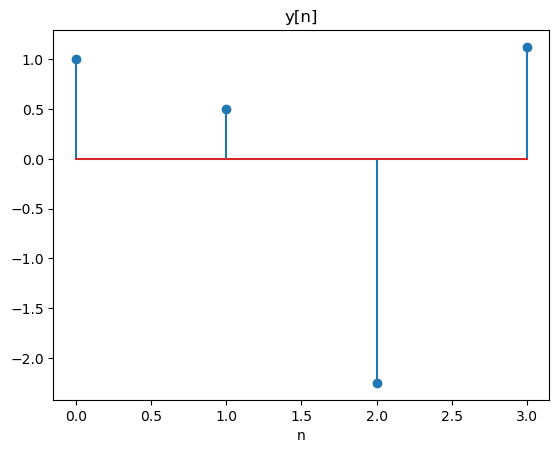

In [8]:
# Çıkış işaretinin grafiğini çizdirmek
from matplotlib import pyplot as plt
n=np.arange(0,4)
plt.stem(n,y)
plt.title('y[n]')
plt.xlabel('n')






2.2 Dürtü cevabı bilinen bir sistemin giriş işaretine verdiği cevabı bulmak

In [11]:
# Hazır fonksiyon kullanmadan konvolüsyon hesaplama

import numpy as np
x=np.array([1,2,-1],dtype=float)
h=np.array([1,3],dtype=float)
nXmin = 0
nHmin = 0
M = len(x)
N = len(h)
L = M + N -1
y=np.zeros(L)
for n in range(L): 
 y[n]=0
 for k in range(M):
     if(n-k)>=0 and (n-k)<N:
         y[n]=y[n]+x[k]*h[n-k]
#Konvülosyon sonucunda elde edilen değerler
print(y)
nY = [i for i in range(nXmin+nHmin,nXmin+nHmin+L)]
#İndeksler
print(nY)

[ 1.  5.  5. -3.]
[0, 1, 2, 3]


In [12]:
import numpy as np
x=np.array([1,0,2,-1],dtype=float)
h=np.array([1,0,0,0,3],dtype=float)

nXmin=-1
nHmin=-2
M=len(x)
N=len(h)
L=M+N-1
y=np.zeros(L)

for n in range(L):
    y[n]=0
    for k in range(M):
        if(n-k)>=0 and (n-k)<N:
            y[n]=y[n]+x[k]*h[n-k]
#Elde Edilen İşaretin Bastırılması
print(y)

nY=[i for i in range(nXmin+nHmin,nXmin+nHmin+L)]
#İndeksler
print(nY)

[ 1.  0.  2. -1.  3.  0.  6. -3.]
[-3, -2, -1, 0, 1, 2, 3, 4]


Text(0.5, 1.0, 'y[n]')

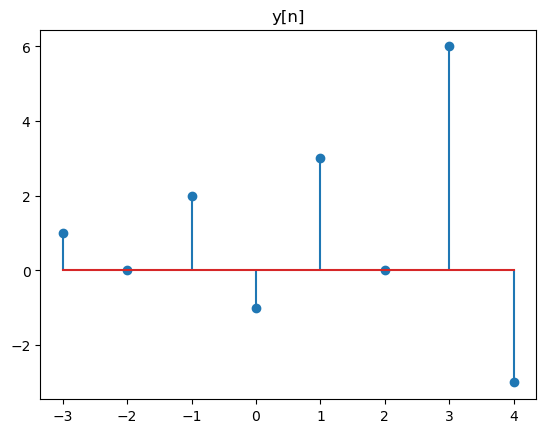

In [13]:
#grafik olarak çizdirilme
import matplotlib.pyplot as plt
plt.stem(nY,y)
plt.title('y[n]')

In [14]:
#Hazır komut kullanarak konvolüsyon hesaplama
import numpy as np
from scipy import signal
x=np.array([1,2,-1],dtype=float)
h=np.array([1,3],dtype=float)
print(np.convolve(x,h)) #From Numpy Library
print(signal.convolve(x,h)) #From Scipy Library

[ 1.  5.  5. -3.]
[ 1.  5.  5. -3.]


# ÖDEV-2


# Soru-1

DZD bir sistemin dürtü yanıtı iki şekilde bulunabilmektedir.
1-)  𝑦[𝑛]=𝑥[𝑛]∗ℎ[𝑛]
 
2-)  𝑌(𝑒^𝑗𝑤)=𝑋(𝑒^𝑗𝑤).𝐻(𝑒^𝑗𝑤)
 
Burada x[n] bilinmeden x[n] ve y[n] arasındaki bağıntı verildiğinden 2. yol tercih edilmeli;
öncelikle  𝑦[𝑛] − 1.2𝑦[𝑛 − 1] = 𝑥[𝑛] − 𝑥[𝑛 − 4] 
işareti fourier transformu alınmalı;
Y(e^jw)-1.2(e^-jw)Y(e^jw)=X(e^jm)-(e^-4jw)X(e^jw)
aynı olanları paranteze çekecek olursak;
Y(e^jw)(1-1.2e^-jw)=X(e^jm)(1-e^-4jw)
Y(e^jm)/X(e^jm) şeklinde yazacak olursak;
H(e^jm)=(1-e^-4jw)/(1-1.2e^-jw)
ifadesi elde edildi. H(e^jw) ifadesinin h(n) dürtü cevabının frekans ortamındak karşılığı olduğunu biliyoruz.
Bu ifadenin ters fourier dönüşümünü alırsak zaman domainindeki karşılığı bizim dürtü yanıtımız olacaktır;
𝐻(𝑒𝑗𝑤) ⟺ h[n]
elde edilen ifadeyi payda olarak ayırırsak;
𝐻(𝑒𝑗𝑤)= (1)/(1-1.2e^-jw) - (e^-4jw)/(1-1.2e^-jw)
ifadesi elde edilir.Ters Fourier alacak olursak;

h[n]=(1.2^n)*u[n]-1.2*(1^n-4)*u[n-4]

dürtü cevabı elde edilir.

# Soru-2

Bu soruda verilen h1[n] sistemine sırasıyla X1[n] ve X2[n] işaretlerini uyguluyıp elde edilen çıkışı görmeye çalışacağız.
verilen sistemin hem girişte hemde çıkışta elde edilen grafikleri gözlemlemeye çalışacağız:

# a-)

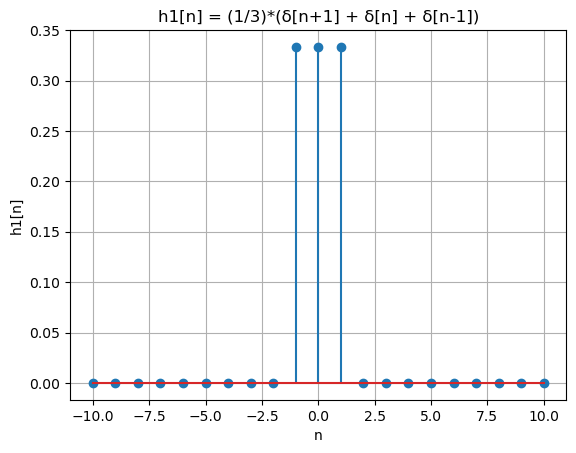

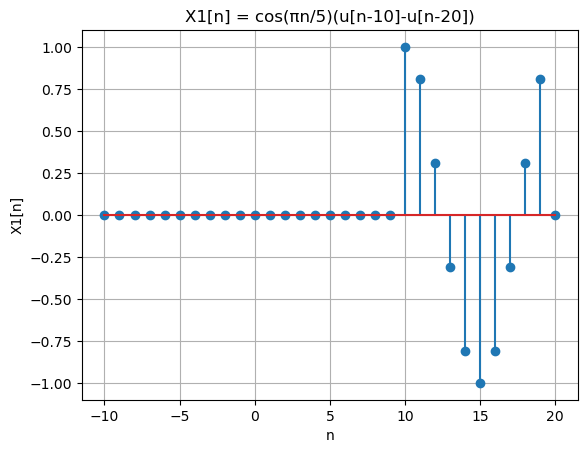

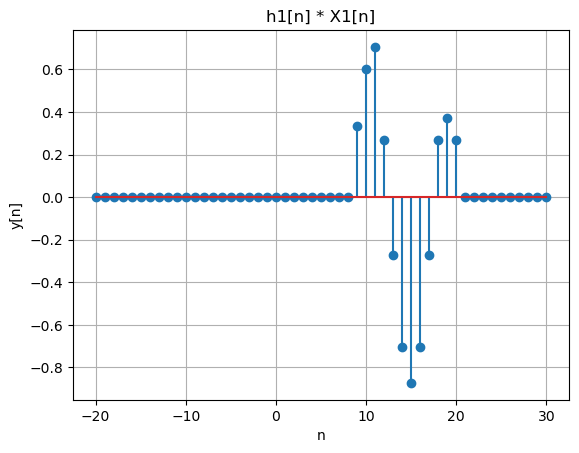

In [29]:
#h1[n]=(1/3)*(dirac[n+1]+dirac[n]+dirac[n-1]
#X1[n]=cos(pi*n/5)(u[n-10]-u[n-20])

import numpy as np
import matplotlib.pyplot as plt

# h1[n] sinyali için örneklem noktaları
n_h = np.arange(-10, 11)

# h1[n] sinyalinin değerleri
h1 = (1/3)*(np.array([1 if i == -1 or i == 0 or i == 1 else 0 for i in n_h]))

# X1[n] sinyali için örneklem noktaları
n_x = np.arange(-10, 21)

# X1[n] sinyalinin değerleri
x1 = np.cos(np.pi * n_x / 5) * (np.heaviside(n_x - 10, 1) - np.heaviside(n_x - 20, 1))

# h1[n] Sinyalinin grafiğini çizdirme
plt.stem(n_h, h1)
plt.xlabel('n')
plt.ylabel('h1[n]')
plt.title('h1[n] = (1/3)*(δ[n+1] + δ[n] + δ[n-1])')
plt.grid(True)
plt.show()

# x1[n] Sinyalinin grafiğini çizdirme
plt.stem(n_x, x1)
plt.xlabel('n')
plt.ylabel('X1[n]')
plt.title('X1[n] = cos(πn/5)(u[n-10]-u[n-20])')
plt.grid(True)
plt.show()


# Konvolüsyon işlemi
y = np.convolve(h1, x1)

# Konvolüsyon sonucunun örneklem noktaları
n_y = np.arange(n_h[0] + n_x[0], n_h[-1] + n_x[-1] + 1)

# Sinyal grafiğini çizdirme
plt.stem(n_y, y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('h1[n] * X1[n]')
plt.grid(True)
plt.show()


# b-)

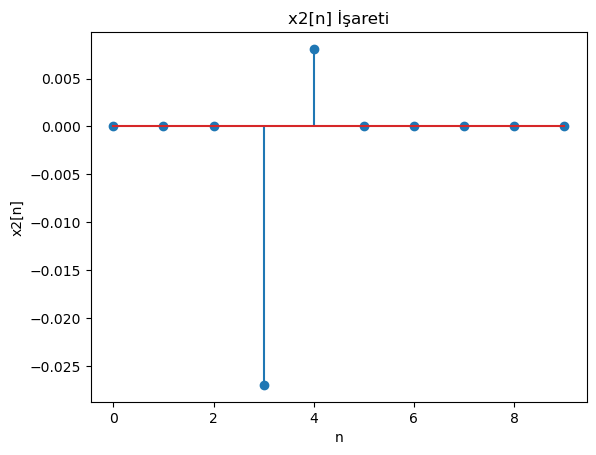

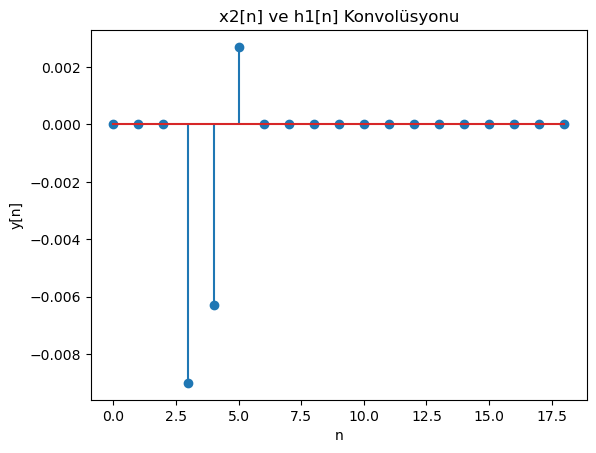

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def x2(n):
    return ((-0.3)**n) * (step(n-3) - step(n-5))

def h1(n):
    return (1/3) * (dirac(n+1) + dirac(n) + dirac(n-1))

def step(n):
    return np.where(n >= 0, 1, 0) #Bütün elemanlar >=0 ise 1 değilse 0 döndür.Dizi olarak göndermemize yardımcı oluyor

def dirac(n):
    return np.where(n == 0, 1, 0) #Bütün elemanlar =0 ise 1 değilse 0 döndür.Dizi olarak göndermemize yardımcı oluyor



n_values = np.arange(0, 10)
x2_n = x2(n_values)
h1_n = h1(n_values)

# x2[n]'i çizdir
plt.stem(n_values, x2_n, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('x2[n]')
plt.title('x2[n] İşareti')
plt.show()

# x2[n] ve h1[n]'i konvülve et
y = convolve(x2_n, h1_n)

# y[n]'i çizdir
plt.stem(y, use_line_collection=True)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('x2[n] ve h1[n] Konvolüsyonu')
plt.show()

